In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


In [9]:
# Load data
df = pd.read_csv("eng_pp_9523_eda_pivoted.csv")

In [10]:
# Define target variables
target_vars = ["Terraced", "Semi-detached", "Detached", "Flat", "Others"]

In [11]:
from sklearn.preprocessing import LabelEncoder

# Create a label encoder
le = LabelEncoder()

# Encode the "Month" column
df["Month"] = le.fit_transform(df["Month"])


In [12]:
# Function to train and evaluate models
def predict_demand(target_var):
    # Filter data for specific property type
    data = df[["Year", "Month"] + [target_var]]
    
    # Create features (you can add more features based on your analysis)
    features = ["Month"]
    
       
     # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(data[features], data[target_var], test_size=0.2)
    
    # Train models (Linear regression and Random forest)
    models = {
      "Linear Regression": LinearRegression(),
      "Random Forest": RandomForestRegressor(n_estimators=100),
  }

    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    
    # Evaluate model performance
    mse = mean_squared_error(y_test, y_pred)
    print(f"{name} - MSE for {target_var}: {mse}")

    # Predict for the next 12 months
    future_months = range(1, 13)
    future_data = pd.DataFrame({"Month": future_months})
    future_pred = model.predict(future_data)

    # Plot predictions
    plt.plot(future_months, future_pred, label=name)
    plt.xlabel("Month")
    plt.ylabel(f"Demand for {target_var}")
    plt.title(f"Predicted Demand for {target_var} (Next 12 Months)")
    plt.legend()
    plt.show()

Random Forest - MSE for Terraced: 0.20606996507860526


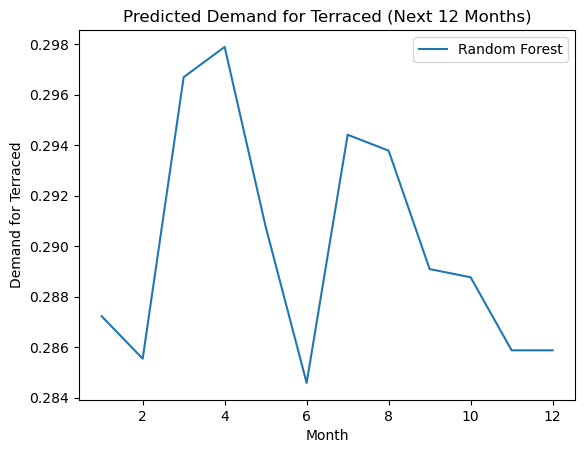

Random Forest - MSE for Semi-detached: 0.19789184365088136


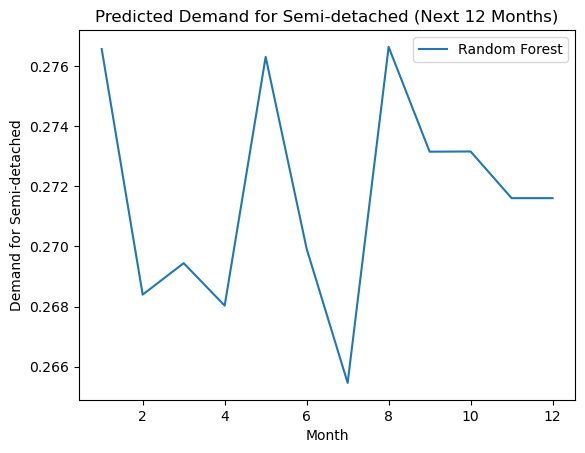

Random Forest - MSE for Detached: 0.1788684632966848


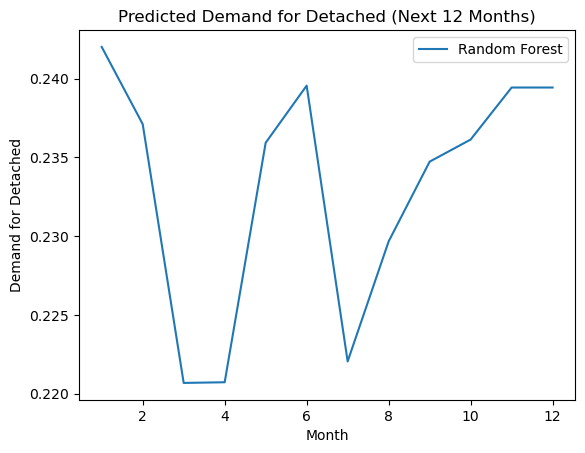

Random Forest - MSE for Flat: 0.15275570833058574


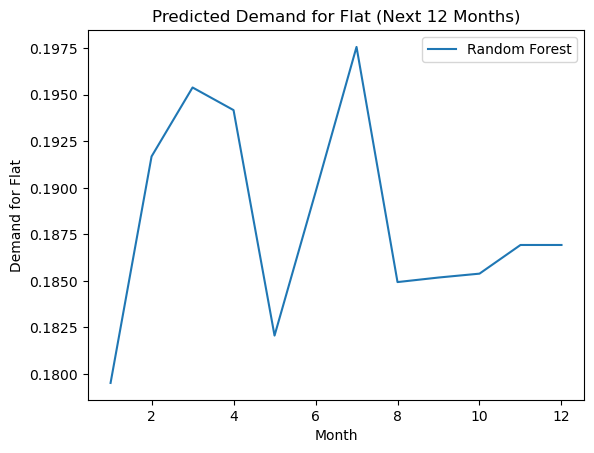

Random Forest - MSE for Others: 0.01640047311619205


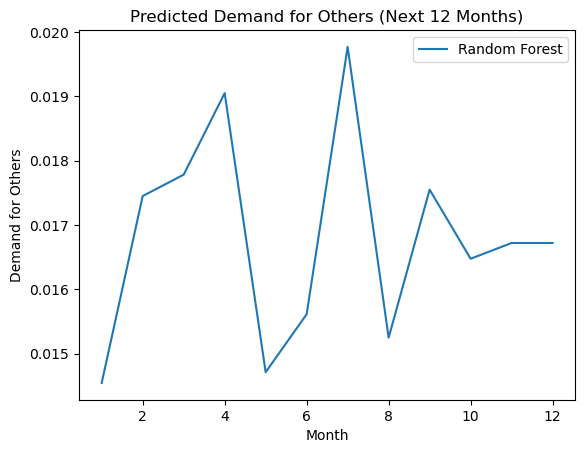

In [13]:
# Predict demand for each property type
for target_var in target_vars:
  predict_demand(target_var)